# Trabalho final de Processamento Digital de Sinais
Assunto: Projeto e Implementação de Filtro Digital

Aluno: Wesley David Santos Lima 
Matrícula: 201833840024 
Matéria: Processamento Digital de Sinais
Turma: Engenharia da Computação 2018

Para um dado problema de PDS, projetar um Filtro Digital e simular e implementar o filtro, interpretando os sinais de entrada e de saída, nos domínios do tempo discreto e da frequência. O projeto e a implementação do filtro deve contemplar as seguintes etapas.

1. Definir o sinal em tempo contínuo;
2. Análise do sinal contínuo no domínio da frequência;
3. Definir o filtro anti-aliasing e a frequência de amostragem apropriada;
4. Amostrar e reconstruir o sinal contínuo;
5. Análise do sinal discreto no domínio da frequência;
6. Definir a banda de frequência de interesse de acordo com a aplicação selecionada;
7. Definir as especificações do Filtro Digital e Projetar o Filtro;
8. Análise do sinal de saída do filtro digital;
9. Comentar e justificar todas as etapas;
10. Simulação e implementação completa


O objetivo desse projeto é criar um filtro capaz de eliminar o ruído presente em um arquivo de audio. Esse ruído acontece em determinados momentos podendo se parecer com um metrônomo (O metrônomo ou metrónomo é um aparelho que através de pulsos de duração regular, indica um andamento musical), podendo ser percebido quando analisado o gráfico do sinal em tempo continuo.

Inicialmente não é possível eliminar completamente o ruído, portanto o objetivo desse trabalho é fazer com que o ruído seja atenuado, sendo possível perceber o áudio presente no ruído de forma mais clara.

Inicialmente é feita a importação das bibliotecas que serão utilizadas no projeto.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from google.colab import files
import pandas as pd
import librosa 
import librosa.display as ld
from IPython.display import Audio
import IPython
import wave
import struct
from scipy import fftpack
from scipy.signal import butter, lfilter, freqz, buttord, freqs
import scipy.io
from scipy import signal

Após isso será feito o upload do arquivo que será analisado.



In [ ]:
uploaded = files.upload()

Saving audio teste.wav to audio teste.wav


In [ ]:
Audio(filename ='audio teste.wav')

Agora e é feita a separação de forma distinta dos dados do arquivo de audio.

In [ ]:
data, fs = librosa.load('audio teste.wav') # Separando de forma distinta os dados do arquivo de áudio

Logo, é mostrada algumas informações que serão úteis para a criação do filtro.

In [ ]:
duracao = data.shape[0] / fs
print("A quantidade de amostras no audio é: ", data.shape[0])
print("A frequência de amostragem do arquivo de audio é: ", fs)
print("A duração do arquivo analisado em segundos é: ", duracao)
print("A dimensão do arquivo de audio é: ")
data

A quantidade de amostras no audio é:  127008
A frequência de amostragem do arquivo de audio é:  22050
A duração do arquivo analisado em segundos é:  5.76
A dimensão do arquivo de audio é: 


array([ 6.2982261e-04,  1.2642991e-03,  1.4731007e-03, ...,
       -9.9909131e-04, -6.0497874e-05,  7.5572456e-04], dtype=float32)

A biblioteca *librosa* é um pacote python para análise de música e áudio. Ele fornece os blocos de construção necessários para criar sistemas de recuperação de informações musicais.
Como a importação do arquivo de audio é feita utilizando a biblioteca 'librosa' o arquivo é mono (contendo apenas uma faixa de audio) e sua dimensão passa a ser um array do tipo float 32 bit.

# Amostrar e Reconstruir o Sinal em Tempo Contínuo
Abaixo é plotado o gráfico do sinal em tempo continuo, essa etapa é importante pois nela é possível observar o comportamento do audio juntamente com o ruido nele presente.

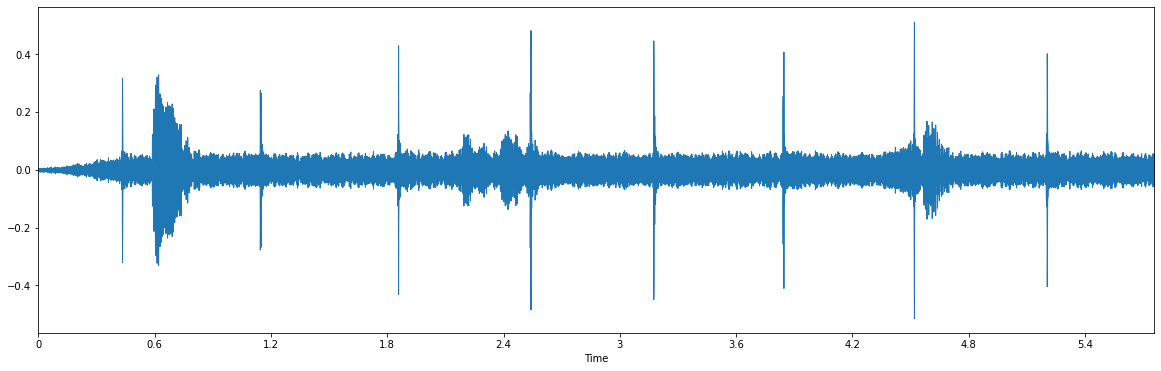

In [ ]:
plt.figure(figsize = (20,6))
ld.waveplot(data, sr=fs)                 # Plotando o gráfico do sinal para análise de comportamento

Após observar o comportamento do sinal é possível observar que o ruído acontece nas partes de maior amplitudo do gráfico, isso é importante já que após utilizar o filtro o deve ser possível notar uma atenuação nessa parte.

Graças a biblioteca librosa também é possível plotar gráficos especficos que conseguem comprovar onde está o ruído no áudio analisado. Então abaixo gerou-se o espectrograma da frequência do áudio que mede a densidade de energia por faziza de frequência. Isso serve para medir a densidade de energia por faixa de frequência presentes no arquivo de áudio, sendo possível observar dinamicamente a densidade espectral de energia (parte vermelha com elevação branca) onde pode-se ver e distinguir o ruído no sinal analisado.

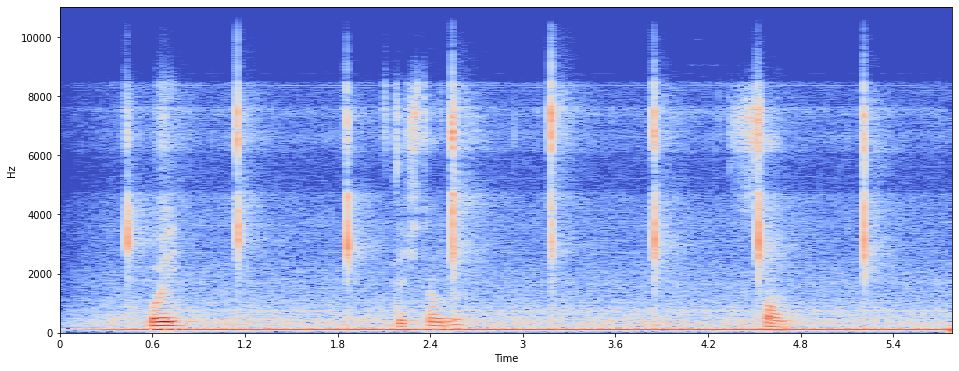

In [ ]:
DATA = librosa.stft(data)
DATAdb = librosa.amplitude_to_db(abs(DATA))

plt.figure(figsize=(16, 6))
ld.specshow(DATAdb, sr=fs, x_axis='time' , y_axis= 'hz')

# Análise do Sinal Discreto no Domínio da Frequência

Após decidir o arquivo de audio que será utilizado é necessário usar a Transformada Discreta de Fourrier para poder gerar o espectro do sinal no dominio da frequencia para assim, poder filtrar o sinal visando a diminuição do ruído.

A Transformada Discreta de Fourrier é muito utilizada para calculo de sinais discretos e periódicos (caso que ocorre no sinal analisado). Seja x[k] uma sequência discreta periódica com período N. A Transformada Discreta de Fourier de X[k] é dada por:
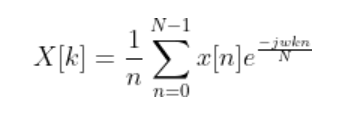

Como o sinal analisado é real, será utilizado a biblioteca **scipy.fft** a mesma faz o calculo da transformada de forma automática e precisa.


In [ ]:
# Transformada rápida de Fourrier
# frames_dominio_frequencia = np.fft.fft(sinal utilizado) 
sinal = data # Criando uma variável chamada "sinal" que irá receber os dados da dimensão do audio.
frames_dominio_frequencia = fftpack.fft(sinal)

# O valor acima está em número complexo, porém queremos em numeros reais
# Isso nos dará a frequência que queremos
magnitude = np.abs(frames_dominio_frequencia)  # Aqui criamos uma variavel magnitude que ira auxiliar para descobrir qual a frequencia maxima do sinal 
fase = np.angle(frames_dominio_frequencia)

duracao = data.shape[0] / fs
tempo = np.linspace(0., duracao, data.shape[0])

print("Quantidade de amostras no arquivo analisado é", magnitude.shape[0], fase.shape)
print("A frequência {} Hertz é onde está presente a maior magnitude do sinal analisado".format(np.where(magnitude == np.max(magnitude))[0][0]))
print("a duracao e ", duracao)

Quantidade de amostras no arquivo analisado é 127008 (127008,)
A frequência 691 Hertz é onde está presente a maior magnitude do sinal analisado
a duracao e  5.76


Após armazenados os valores de fase, magnitude é possível definir o gráfico do espectro do sinal no dominio da frequência.

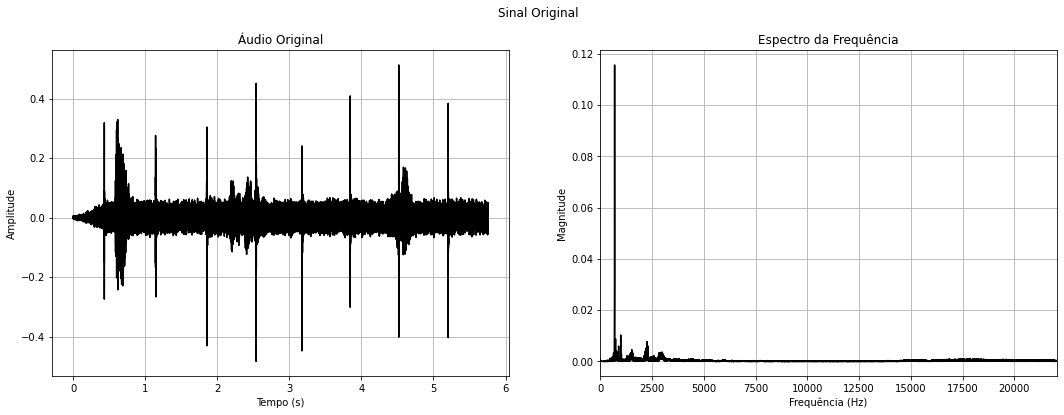

In [ ]:
fig = plt.figure(figsize = (18, 6))
fig.suptitle('Sinal Original')
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Áudio Original")
ax1.set_xlabel("Tempo (s)")
ax1.set_ylabel("Amplitude")
ax1.grid()
ax1.plot(tempo, sinal, 'k')

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Espectro da Frequência")
ax2.set_xlabel("Frequência (Hz)")
ax2.set_ylabel("Magnitude")
ax2.set_xlim(0, 22050)
ax2.grid()
ax2.plot(magnitude / fs, 'k')
plt.show()

Agora para uma melhor analise do grafico do espectro da frequencia, foi plotado o mesmo com um tamanho maior para melhor visualização.

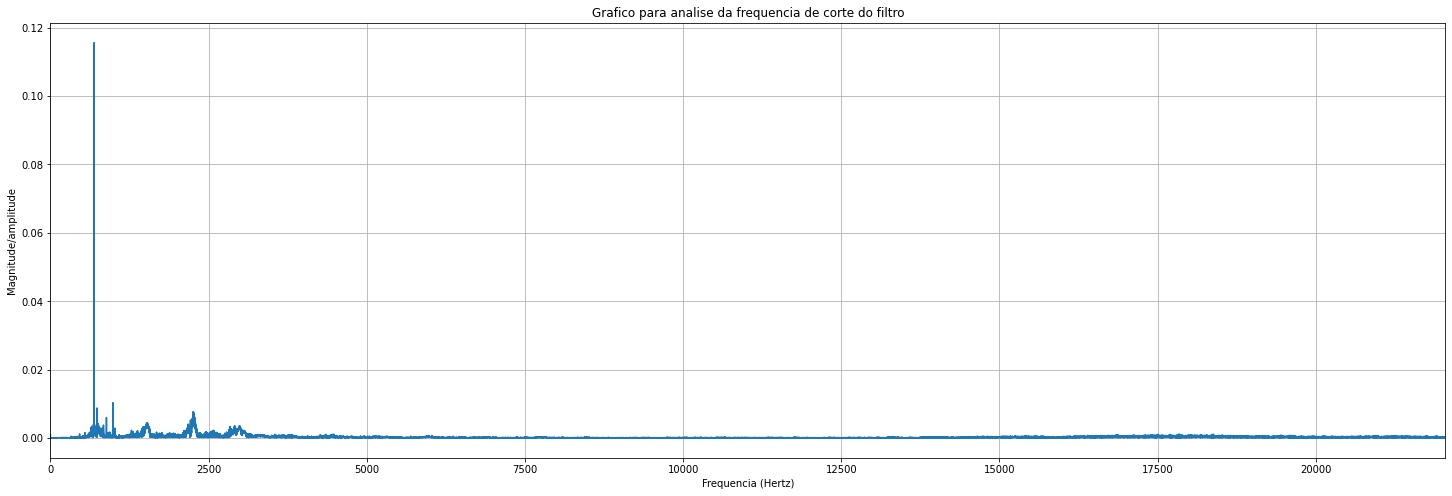

In [ ]:
plt.figure(figsize=(25, 8))
plt.plot(magnitude / fs, label = "Analise da frequencia ate 22050")
plt.title("Grafico para analise da frequencia de corte do filtro")
plt.xlabel("Frequencia (Hertz)")
plt.ylabel("Magnitude/amplitude")
plt.xlim(0, 22050)
plt.grid()
plt.show()

# Definir o Filtro Anti-Aliasing e a Frequência de Amostragem Apropriada

O filtro anti-aliasing é uma espécie de filtro presente em bastante aplicações, sendo elas de áudio ou imagem (sendo este ultimo bastante presente em games). Um filtro anti-alias ideal passa todas as frequências de entrada apropriadas e corta todas as frequências indesejadas. No entanto, tal filtro não é fisicamente realizável. Na prática, os filtros têm a aparência mostrada na ilustração abaixo. 

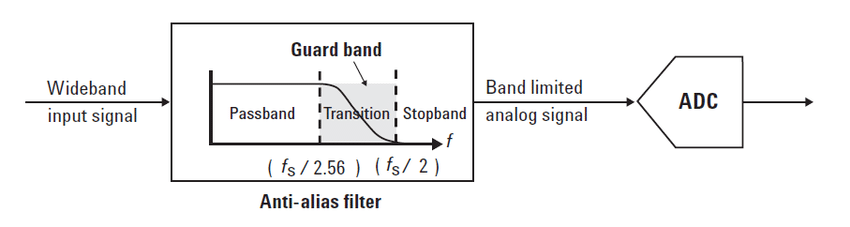

O áudio utilizado como sinal nesse trabalho foi gravado pelo gravador de áudio de um celular Xiaomi Redmi Note 8 Pro (a ficha técnica do gravador utilizado e as suas especificações não foram encontradas), por se tratar de um sinal real gravado por um celular o filtro anti-aliasing é implementado diretamente, sem interferência de um usuário.



# Definir a Banda de Frequência de Interesse de Acordo com a Aplicação Selecionada

A partir da analise do gráfico no dominio da frequência é possível perceber que a atenuação onde se encontra o ruído que se deseja eliminar está na frequência 1300 hz. Sendo essa a frequência de corte utilizada.

# Definir as Especificações do Filtro Digital e Projetar o Filtro

Para filtragem precisa do ruído será utilizado o Filtro Passa-Baixa, visto que o mesmo permitem a passagem de sinais de baixa frequência e reduzem a intensidade de sinais de alta frequência, ou seja, a partir de uma frequência de referência ele permite que frequências mais baixas que ela passem livremente e frequências mais altas sejam atenuadas. 

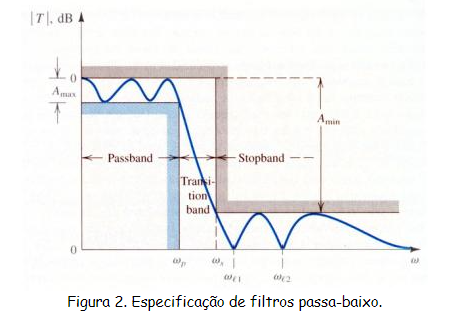

Na imagem acima é possível ver como funciona um Filtro Passa-Baixa, é possível identificar 3 bandas distintas, a **banda de passagem**, **banda de transição** e a **banda de parada** (passband, transition band e stopband). A banda de passagem corresponde às frequências do sinal de entrada que passam para a saída sem atenuação ou com atenuação ligeira, já a banda de transição é a zona intermédia entre as duas anteriores, nesta zona o comportamento do filtro varia entre a atenuação ligeira e a rejeição do sinal de entrada e a banda de parada corresponde à gama de frequências do sinal de entrada que são rejeitadas pelo filtro.

A utilização do filtro é correta do tipo de filtro é importante e já que é possível observar que o ruído no áudio está presente onde a amplitude da frequência é maior, então deixando passar apenas as frequências abaixo da faixa de corte e atenuando as acima, faz com que seja minimizado os ruídos no arquivo de áudio. 

Logo, o filtro utilizado vai ser um filtro Passa Baixa de Butterworth, o filtro de Butterworth visa eliminar o *ripple* na banda de passagem e na banda de corte, visando ter uma resposta plana (*flat*) e como custo disso, tem-se uma banda de transição mais lenta. Sua resposta apenas estipula o módulo da magnitude da função de transferência.

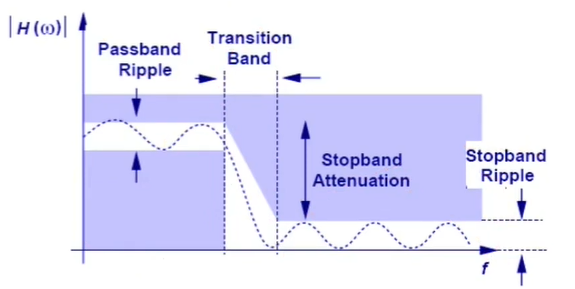


Para fazer o filtro é preciso definir alguns parametros que são importantes que são esses:

1.   Frequência de corte na banda de passagem (0.11791383219954649 radianos).
2.   Taxa de amostragem (22050).
3.   Frequência de corte na banda de parada (0.18140589569160998 radianos).
4.   Ondulação na banda de passagem (1 dB).
5.   Atenuação na banda de passagem (30 db).
6.   Ordem utilizada no filtro (10).



Essas informações são necessárias e existe uma forma de calcular elas afim de descobrir a ordem do filtro, que está diretamente ligada na atenuação do sinal na banda de passagem.

No código em questão usamos a signal.buttord() que será responsável por fazer o cálculo a fim de descobrir a ordem do filtro.

O cálculo para encontrar essas informações estão no código abaixo.

In [ ]:
fpb = 1300                                    # Frequência de corte.
wp = fpb / (fs/2)                             # Calculo para frequência de corte na banda de passagem
fsb = 2000                                    # Frequência de parada do filtro.
ws = fsb / (fs/2)                             # Cálculo para frequência de corte na banda de parada.
alpha_ap = 1                                # Ondulação na banda de passagem.
alpha_as = 30                                 # Atenuação ba banda de parada.
N, Wn = buttord(wp, ws, alpha_ap, alpha_as)   # Usando a biblioteca para descobrir a ordem do filtro.
print("A ordem do filtro é: ", N)

A ordem do filtro é:  10


Abaixo temos a iniciação do filtro, para fazê-lo é iniciada o comando "def butter_lowpass_filter" que passando os parâmetros correto faz o calculo com precisão do filtro passa baixa utilizando o sinal de áudio.

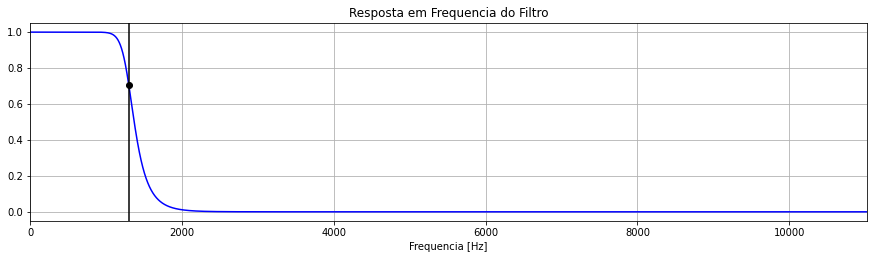

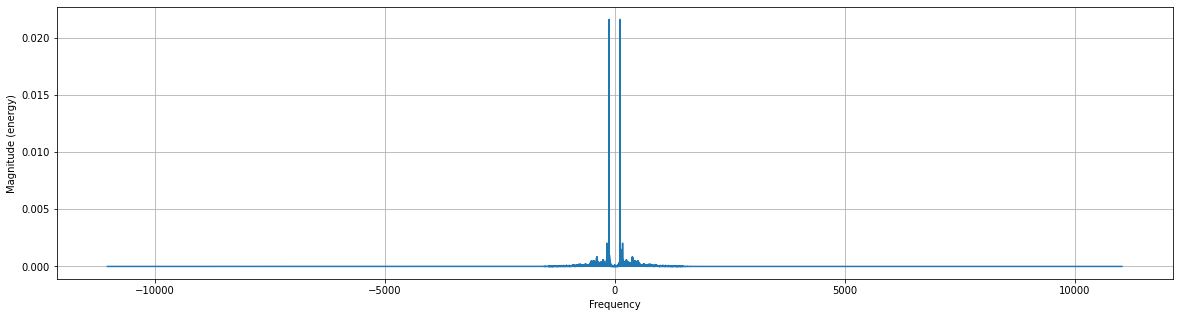

In [ ]:
def butter_lowpass(cutoff, fs, order=10):
    nyq = 0.5 * fs                                                        # Frequência de Nyquist
    normal_cutoff = cutoff / nyq                                          # Frequência de corte na banda de passagem
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
    
def butter_lowpass_filter(data, cutoff, fs, order=10):                    # Requerimentos do filtro necessárias para a resposta em frequência
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    w, h = signal.freqz(b, a, worN=8000)
    plt.figure(figsize=(15,8)) 
    plt.subplot(2, 1, 1)
    plt.grid()
    plt.plot(0.5 *fs*w/np.pi, np.abs(h), 'b')
    plt.plot(cutoff, 0.5 * np.sqrt(2), 'ko')
    plt.axvline(cutoff, color='k')
    plt.xlim(0, 0.5*fs)
    plt.title("Resposta em Frequencia do Filtro")
    plt.xlabel('Frequencia [Hz]')
    plt.show()                                                          # Plotando a resposta em frequência do filtro
    return y
# Parametros do filtro                                                                 
order = 10
fs = 22050       
cutoff = 1300
y = butter_lowpass_filter(sinal, cutoff, fs, order)
plt.figure(figsize=(20,5)) 
plt.magnitude_spectrum(y, Fs=fs, sides='twosided')
plt.title('')
plt.grid()

Após implementado o filtro, é possível plotar o gráfico da resposta em frequência do filtro.
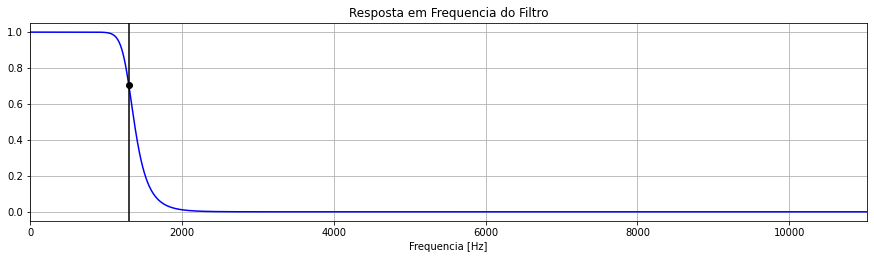

A partir do gráfico da resposta e frequência é possível observar a banda de passagem, banda de atenuação e a banda de parada do filtro. É possíve lobservar também onde ocorre o corte estipulado no filtro.

# Análise do Sinal de Saída do Filtro Digital
Abaixo tem-se o áudio filtrado, sendo possível perceber uma diferença em relação ao áudio original e uma diminuição no ruído.

In [ ]:
# Audio filtrado
IPython.display.Audio(data = y, rate= 22050)

In [ ]:
# Audio original
Audio(filename ='audio teste.wav')

Ao reproduzir os áudios acima é possível perceber que no filtrado houve uma atenuação no ruído, mostrando que o filtro está cumprindo bem o seu papel.

Após isso, pode-se obervar o gráfico do áudio no tempo (abaixo), os mesmos estão referenciados pela quantidade de amostras, a primeira vista se nota pouca diferença entre os gráficos, isso se deve pois o filtro está sendo passado em uma alta frequência, fazendo com que boa partes dos valores não sejam rejeitado pelo filtro.

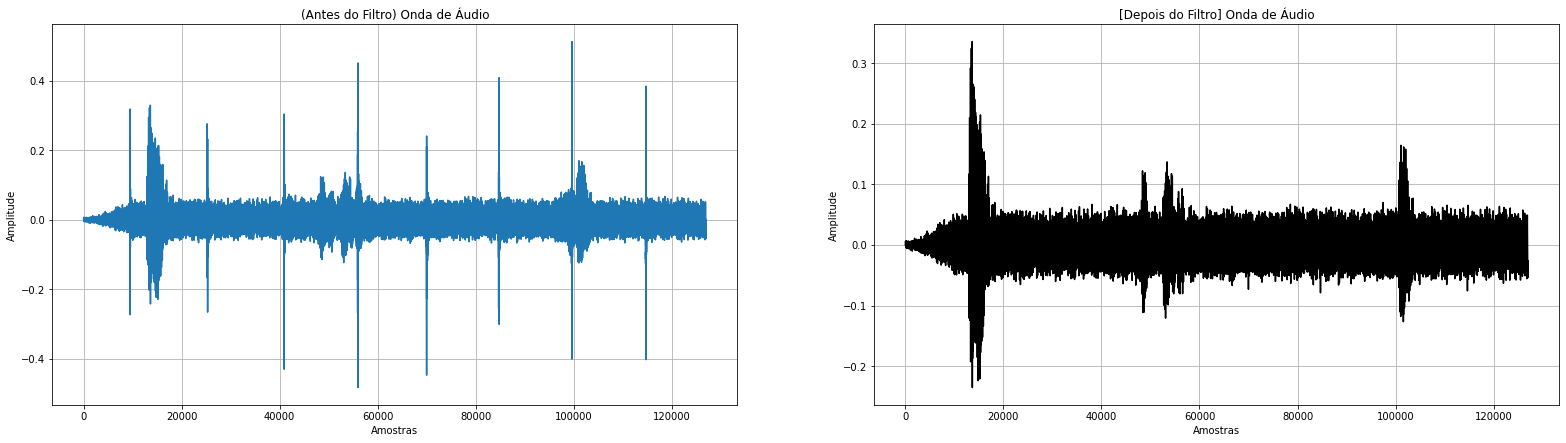

In [ ]:
fig = plt.figure(figsize = (27, 7))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("(Antes do Filtro) Onda de Áudio")
ax1.set_xlabel("Amostras")
ax1.set_ylabel("Amplitude")
ax1.plot(sinal)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("[Depois do Filtro] Onda de Áudio")
ax2.set_xlabel("Amostras")
ax2.set_ylabel("Amplitude")
ax2.plot(y, 'k')
plt.grid()

Também é possível observar abaixo o espectro no Domínio da Frequência, inicialmente também não é possível notar muita diferença já que a faixa de frequência de corte é alta, sendo assim, os dois são bem similares.

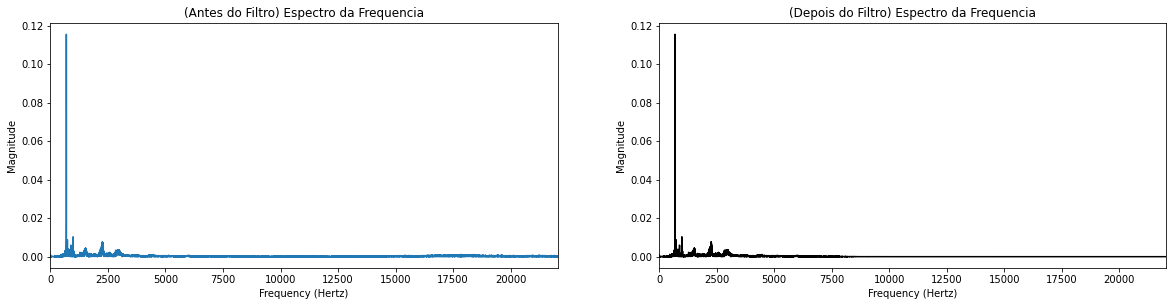

In [ ]:
fig = plt.figure(figsize = (20, 4.5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("(Antes do Filtro) Espectro da Frequencia")
ax1.set_xlabel("Frequency (Hertz)")
ax1.set_ylabel("Magnitude")
ax1.set_xlim(0, 22050)  
ax1.plot(magnitude/fs)

m = np.abs(fftpack.fft(y))
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("(Depois do Filtro) Espectro da Frequencia")
ax2.set_xlabel("Frequency (Hertz)")
ax2.set_ylabel("Magnitude")
ax2.set_xlim(0, 22050)  # 
ax2.plot(np.abs(fftpack.fft(y)) / fs, 'k')
plt.show()
#IPython.display.Audio(data=y, rate=22050)

Para uma melhor análise do filtro, foi feito também um gráfico que reproduz exatamente uma passagem no mesmo ponto, sendo um gráfico voltado ao sinal original no dominio do tempo e o outro  sinal após a utilização do filtro no domínio do tempo.

É possível observar que o gráfico do sinal filtrado possui uma leve suavidade em relação ao gráfico do sinal sem filtro (presente no final do gráfico). 

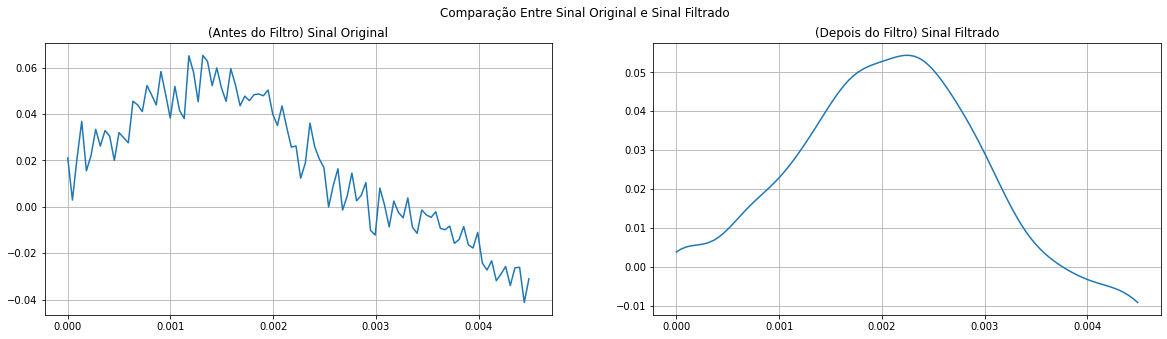

In [ ]:
# intervalo para observação sem filtro audio no dominio do
fig = plt.figure(figsize = (20, 5))
fig.suptitle('Comparação Entre Sinal Original e Sinal Filtrado')
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("(Antes do Filtro) Sinal Original")
intervalo_interesse = sinal[70400:70500]
sample = np.arange(0,100)
plt.plot(sample/fs, intervalo_interesse)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("(Depois do Filtro) Sinal Filtrado")
intervalo_interesse_filter = y[70400:70500]
sample = np.arange(0,100)
plt.plot(sample/fs, intervalo_interesse_filter)
plt.grid()
plt.show()

Também é possível observar o mesmo comportamento quando se refere ao grafico do dominio da frequência, apenas observando eles são bem parecidos mas quando se amplia os dois gráficos no mesmo ponto é possível perceber uma diferença do sinal filtrado em relação ao sinal original.

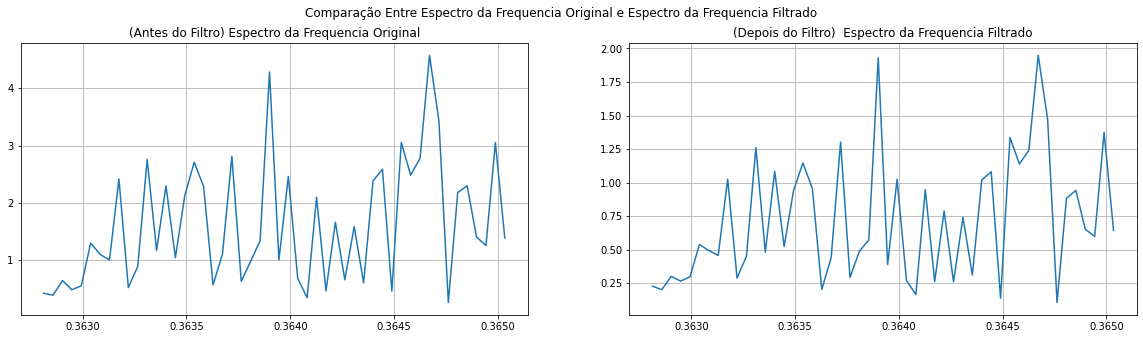

In [ ]:
# intervalo para observação sem filtro audio no dominio do
fig = plt.figure(figsize = (20, 5))
fig.suptitle('Comparação Entre Espectro da Frequencia Original e Espectro da Frequencia Filtrado')
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("(Antes do Filtro) Espectro da Frequencia Original")
n = magnitude
intervalo_interesse_fft = n[8000:8050]
sample = np.arange(8000,8050)
plt.plot(sample/fs, intervalo_interesse_fft)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("(Depois do Filtro)  Espectro da Frequencia Filtrado")
m = np.abs(fftpack.fft(y))
intervalo_interesse_fft_filter = m[8000:8050]
sample = np.arange(8000,8050)
plt.plot(sample/fs, intervalo_interesse_fft_filter)
plt.grid()
plt.show()

# Considerações Finais

Após as análises feitas foi possível perceber que o filtro cumpriu bem o seu papel de atenuar o ruído presente no arquivo de áudio, isso é perceptível após analisar os gráficos de antes e depois do sinal, sendo assim, cumprida as etapas para realização do projeto.

## Referências

**Instituto Superior de Ciências do Trabalho e da Empresa**: [Circuitos e Sistemas Eletrônicos](http://cadeiras.iscte.pt/cse/Folhas/Filtros/Filtros.htm) - Acessado em 27/06/2022

**Scipy Documentation**: [scipy.signal.butter](https://https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter) - Acessado em: 24/06/2022

**Allen Downey**: [Introdução ao Processamento Digital de Sinais em Python](https://https://github.com/AllenDowney/ThinkDSP) - Acessado em 18/06/2022

**Ricardo H. C. Takahashi**: [Transformada Discreta de Fourrier: Motivação e Aplicações](https://http://pgcl.uenf.br/arquivos/transformadadiscretadefourier:motivacaoeaplicacao_011120181555.pdf) - Acessado em: 21/06/2022

**Wikipédia - A Enciclopédia Livre**: [Filtro Butterworth](https://https://pt.wikipedia.org/wiki/Filtro_Butterworth) - Acessado em 27/06/2022

